In [1]:
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
import re


In [14]:
flairs = [
    "Artificial Intelligence",
    "Biotechnology",
    "Business",
    "Crypto",
    "Energy",
    "Hardware",
    "Machine Learning",
    "Nanotech/Materials",
    "Networking/Telecom",
    "Net Neutrality",
    "Politics",
    "Privacy",
    "Robotics/Automation",
    "Security",
    "Social Media",
    "Society",
    "Software",
    "Space",
    "Transportation"
]

# Create empty lists to store post and comment data for all flairs
all_post_data = []
all_comment_data = []

for flair in flairs:
    # Load the post data for the current flair
    post_data = pd.read_csv(f"{flair.replace('/', '_')}.csv")
    # Append the post data to the list
    all_post_data.append(post_data)
    
    # Load the comment data for the current flair
    comment_data = pd.read_csv(f"{flair.replace('/', '_')}_comments.csv")
    all_comment_data.append(comment_data)

# Concatenate all post data into a single DataFrame
all_posts_df = pd.concat(all_post_data, ignore_index=True)

# Concatenate all comment data into a single DataFrame
all_comments_df = pd.concat(all_comment_data, ignore_index=True)

In [9]:
post_data.head()

post_id                                         post_title
0  11xmuny  Hyundai Promises To Keep Buttons in Cars Becau...
1   v4ugvg  Electric Vehicles are measurably reducing glob...
2   v3lel5  Ford Is Going to 100% Online, Fixed-Price Sale...
3  13rsxb5  Whistleblower Drops 100 Gigabytes Of Tesla Sec...
4   uug6o2  Tesla Asking Owners to Limit Charging During T...

In [10]:
post_data

post_id                                         post_title
0    11xmuny  Hyundai Promises To Keep Buttons in Cars Becau...
1     v4ugvg  Electric Vehicles are measurably reducing glob...
2     v3lel5  Ford Is Going to 100% Online, Fixed-Price Sale...
3    13rsxb5  Whistleblower Drops 100 Gigabytes Of Tesla Sec...
4     uug6o2  Tesla Asking Owners to Limit Charging During T...
..       ...                                                ...
233  190nstp  Turkish Airlines grounds its fleet of Boeing 7...
234   q12prn  The classic cars being converted to electric v...
235   woagum  A New Jailbreak for John Deere Tractors Rides ...
236   v71tux  Car companies haven’t figured out if they’ll l...
237   u6h3ky  Rivian CEO warns the looming EV battery shorta...

[238 rows x 2 columns]

In [11]:
comment_data

post_id comment_id                                            comment
0      11xmuny    jd3yajx                        I hate fake virtual buttons
1      11xmuny    jd3wid9  Nice. Can't stand how tablets are slapped onto...
2      11xmuny    jd47oi4  GIVE ME A FUCKING VOLUME KNOB PLEASE ITS ALL I...
3      11xmuny    jd3tr5k  I have a Tesla. This article is 100% correct. ...
4      11xmuny    jd42ssa  Possibly the most egregious example of this is...
...        ...        ...                                                ...
20330   q12prn    hfflr5g                                   protean electric
20331   q12prn    hfgmjln  there are supply chain problems for modern ele...
20332   q12prn    hfjvhny  I’d like to see an old Chevy Impala  \n conver...
20333   q12prn    hfkn175  Electric Vehicles are the future of the automo...
20334   q12prn    hihe56y  It would be a massive waste of time and money....

[20335 rows x 3 columns]

In [12]:
all_post_data


[     post_id                                         post_title
 0     gjzjtg  "Facebook sucks"—Elon Musk hits back at Facebo...
 1     vt8du3  Google’s Allegedly Sentient Artificial Intelli...
 2    122u11v  There's No Such Thing as Artificial Intelligen...
 3     vajoll  Google engineer thinks artificial intelligence...
 4    185opxj  5000-Year-Old Tablets Can Now Be Decoded by Ar...
 ..       ...                                                ...
 184  141clbn  The top 50 books being used to train ChatGPT —...
 185  144pf9s  Henry Kissinger’s Latest Intellectual Conquest...
 186  10h716m  Artificial intelligence chat app lets you talk...
 187   z311ob  Should You Let Artificial Intelligence Plan Yo...
 188  17v2fjw  White faces generated by artificial intelligen...
 
 [189 rows x 2 columns],
      post_id                                         post_title
 0     qt0lrk  Hallucinogen in 'magic mushrooms' relieves dep...
 1     qqrf5b  Brain implant translates paralyzed man's thoug..

In [15]:
all_comment_data

[      post_id comment_id                                            comment
 0      gjzjtg    fqo41jg  Facebook does suck. So —They’re both right! Ev...
 1      gjzjtg    fqokvxh  Why do I keep seeing irrelevant news about Elo...
 2      gjzjtg    fqoep7a  The head of Facebook AI, Yann Lecun, recently ...
 3      gjzjtg    fqonm2v                                          [removed]
 4      gjzjtg    fqo6vx0                     Is Elon having Midlife crisis?
 ...       ...        ...                                                ...
 2162  19c0h09    kizwbf1  No. Consciousness is fed by awareness, the gre...
 2163  19c0h09    kj00izh  Nature already did it, so we can do it as well...
 2164  19c0h09    kj060se  Idk, no need to reproduce, no endocrine system...
 2165  19c0h09    kj0hy03  It already is (in my opinion). But so are plan...
 2166  19c0h09    kjg5x2f  Joscha’s lectures are some of my favorite on t...
 
 [2167 rows x 3 columns],
        post_id comment_id                      

In [16]:
all_posts_df

post_id                                         post_title
0      gjzjtg  "Facebook sucks"—Elon Musk hits back at Facebo...
1      vt8du3  Google’s Allegedly Sentient Artificial Intelli...
2     122u11v  There's No Such Thing as Artificial Intelligen...
3      vajoll  Google engineer thinks artificial intelligence...
4     185opxj  5000-Year-Old Tablets Can Now Be Decoded by Ar...
...       ...                                                ...
4348  190nstp  Turkish Airlines grounds its fleet of Boeing 7...
4349   q12prn  The classic cars being converted to electric v...
4350   woagum  A New Jailbreak for John Deere Tractors Rides ...
4351   v71tux  Car companies haven’t figured out if they’ll l...
4352   u6h3ky  Rivian CEO warns the looming EV battery shorta...

[4353 rows x 2 columns]

In [17]:
all_comments_df

post_id comment_id                                            comment
0       gjzjtg    fqo41jg  Facebook does suck. So —They’re both right! Ev...
1       gjzjtg    fqokvxh  Why do I keep seeing irrelevant news about Elo...
2       gjzjtg    fqoep7a  The head of Facebook AI, Yann Lecun, recently ...
3       gjzjtg    fqonm2v                                          [removed]
4       gjzjtg    fqo6vx0                     Is Elon having Midlife crisis?
...        ...        ...                                                ...
303076  q12prn    hfflr5g                                   protean electric
303077  q12prn    hfgmjln  there are supply chain problems for modern ele...
303078  q12prn    hfjvhny  I’d like to see an old Chevy Impala  \n conver...
303079  q12prn    hfkn175  Electric Vehicles are the future of the automo...
303080  q12prn    hihe56y  It would be a massive waste of time and money....

[303081 rows x 3 columns]

In [18]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import re
import string
import spacy

# Load English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Define stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercasing
    text = text.lower()
    
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Remove [deleted] and [removed]
    text = re.sub(r'\[deleted\]|\[removed\]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    doc = nlp(' '.join(words))
    words = [token.lemma_ for token in doc]
    
    # Remove numbers
    words = [word for word in words if not word.isdigit()]
    
    # Remove punctuation
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
    
    # Remove white spaces
    words = [word.strip() for word in words]
    
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
# Clean post titles
all_posts_df['cleaned_title'] = all_posts_df['post_title'].apply(clean_text)

# Clean comments
all_comments_df['cleaned_comment'] = all_comments_df['comment'].apply(clean_text)


In [26]:
all_posts_df

0         facebook suck  — elon musk hit back facebook...
1       google  allegedly sentient artificial intellig...
2       s thing artificial intelligence  term breed mi...
3       google engineer think artificial intelligence ...
4        year  old tablet decode artificial intelligen...
                              ...                        
4348    turkish airline ground fleet boeing max jet fo...
4349                 classic car convert electric vehicle
4350    new jailbreak john deere tractor ride right  t...
4351    car company  figure  let apple carplay take sc...
4352    rivian ceo warn loom ev battery shortage make ...
Name: cleaned_title, Length: 4353, dtype: object

In [28]:
all_comments_df['cleaned_comment']

0               facebook suck  — they  right  everyone win 
1         keep see irrelevant news elon musk   care thin...
2         head facebook ai  yann lecun  recently receive...
3                                                          
4                                      elon midlife crisis 
                                ...                        
303076                                     protean electric
303077    supply chain problem modern electronic  remember 
303078          like see old chevy impala convert electric 
303079    electric vehicle future automobile industry en...
303080    would massive waste time money  get well elect...
Name: cleaned_comment, Length: 303081, dtype: object

In [29]:
all_posts_df

post_id                                         post_title  \
0      gjzjtg  "Facebook sucks"—Elon Musk hits back at Facebo...   
1      vt8du3  Google’s Allegedly Sentient Artificial Intelli...   
2     122u11v  There's No Such Thing as Artificial Intelligen...   
3      vajoll  Google engineer thinks artificial intelligence...   
4     185opxj  5000-Year-Old Tablets Can Now Be Decoded by Ar...   
...       ...                                                ...   
4348  190nstp  Turkish Airlines grounds its fleet of Boeing 7...   
4349   q12prn  The classic cars being converted to electric v...   
4350   woagum  A New Jailbreak for John Deere Tractors Rides ...   
4351   v71tux  Car companies haven’t figured out if they’ll l...   
4352   u6h3ky  Rivian CEO warns the looming EV battery shorta...   

                                          cleaned_title  
0       facebook suck  — elon musk hit back facebook...  
1     google  allegedly sentient artificial intellig...  
2     s thing artificial intelligence  term breed mi...  
3     google engineer think artificial intelligence ...  
4      year  old tablet decode artificial intelligen...  
...                                                 ...  
4348  turkish airline ground fleet boeing max jet fo...  
4349               classic car convert electric vehicle  
4350  new jailbreak john deere tractor ride right  t...  
4351  car company  figure  let apple carplay take sc...  
4352  rivian ceo warn loom ev battery shortage make ...  

[4353 rows x 3 columns]

In [30]:
all_comments_df

post_id comment_id                                            comment  \
0       gjzjtg    fqo41jg  Facebook does suck. So —They’re both right! Ev...   
1       gjzjtg    fqokvxh  Why do I keep seeing irrelevant news about Elo...   
2       gjzjtg    fqoep7a  The head of Facebook AI, Yann Lecun, recently ...   
3       gjzjtg    fqonm2v                                          [removed]   
4       gjzjtg    fqo6vx0                     Is Elon having Midlife crisis?   
...        ...        ...                                                ...   
303076  q12prn    hfflr5g                                   protean electric   
303077  q12prn    hfgmjln  there are supply chain problems for modern ele...   
303078  q12prn    hfjvhny  I’d like to see an old Chevy Impala  \n conver...   
303079  q12prn    hfkn175  Electric Vehicles are the future of the automo...   
303080  q12prn    hihe56y  It would be a massive waste of time and money....   

                                          cleaned_comment  
0             facebook suck  — they  right  everyone win   
1       keep see irrelevant news elon musk   care thin...  
2       head facebook ai  yann lecun  recently receive...  
3                                                          
4                                    elon midlife crisis   
...                                                   ...  
303076                                   protean electric  
303077  supply chain problem modern electronic  remember   
303078        like see old chevy impala convert electric   
303079  electric vehicle future automobile industry en...  
303080  would massive waste time money  get well elect...  

[303081 rows x 4 columns]

In [31]:
all_posts_df['cleaned_title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4353 entries, 0 to 4352
Series name: cleaned_title
Non-Null Count  Dtype 
--------------  ----- 
4353 non-null   object
dtypes: object(1)
memory usage: 34.1+ KB


In [34]:
all_comments_df['cleaned_comment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303081 entries, 0 to 303080
Series name: cleaned_comment
Non-Null Count   Dtype 
--------------   ----- 
303081 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [1]:
all_posts_df.to_csv('cleaned_posts.csv', index=False)
all_comments_df.to_csv('cleaned_comments.csv', index=False)

NameError: name 'all_posts_df' is not defined

In [2]:
all_posts_df = pd.read_csv('cleaned_posts.csv', encoding='latin1')
all_comments_df = pd.read_csv('cleaned_comments.csv', encoding='latin1')
all_posts_df.head()

post_id                                         post_title  \
0   gjzjtg  "Facebook sucks"ýýýElon Musk hits back at Face...   
1   vt8du3  Googleï¿½ï¿½ï¿½s Allegedly Sentient Artificial...   
2  122u11v  There's No Such Thing as Artificial Intelligen...   
3   vajoll  Google engineer thinks artificial intelligence...   
4  185opxj  5000-Year-Old Tablets Can Now Be Decoded by Ar...   

                                       cleaned_title  
0    facebook suck  ï¿½ï¿½ï¿½ elon musk hit back ...  
1  google  allegedly sentient artificial intellig...  
2  s thing artificial intelligence  term breed mi...  
3  google engineer think artificial intelligence ...  
4   year  old tablet decode artificial intelligen...

In [3]:
training,testing = np.split(all_posts_df,[int(.7*len(all_posts_df))])
testing.reset_index(drop=True,inplace = True)

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
stop_words = ["a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent","arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","different","do","does","doing","done","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","have","having","he","hed","hence","her","here","hereafter","hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","it","itd","its","itself","j","just","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most","mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","she","shed","shes","should","show","showed","shown","showns","shows","significant","significantly",
               "similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","t","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","thats","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","thereof","therere","theres","thereto","thereupon","these","they","theyd","theyre","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til","tip","to","together","too","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","very","via","viz","vol","vols","vs","w","want","wants","was","wasnt","way","we","wed","welcome","went","were","werent","we've","what","whatever","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would","wouldnt","www","x","y","yes","yet","you","youd","your","youre","yours","yourself","yourselves","z","zero","¿½ï","ý","½ï","½"]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create a list of cleaned post titles
cleaned_titles = list(all_posts_df['cleaned_title'])

# Initialize CountVectorizer
vec = CountVectorizer(lowercase=True, stop_words = stop_words, ngram_range=(1, 3), max_features=5000)

# Fit and transform the cleaned post titles
X = vec.fit_transform(cleaned_titles)

# Get the feature names
feature_names = vec.get_feature_names_out()

# Create a DataFrame from the document-term matrix
dtm_posts = pd.DataFrame(X.toarray(), columns=feature_names)

# Display the first few rows of the document-term matrix
print(dtm_posts.head())


C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ve'] not in stop_words.
  warnings.warn(


   1000  10000  100000  100mbps  10mbps  10mbps upload  10x  12  15  1500  \
0     0      0       0        0       0              0    0   0   0     0   
1     0      0       0        0       0              0    0   0   0     0   
2     0      0       0        0       0              0    0   0   0     0   
3     0      0       0        0       0              0    0   0   0     0   
4     0      0       0        0       0              0    0   0   0     0   

   ...  york lawmaker  york times  young  young people  youtube  zone  zoom  \
0  ...              0           0      0             0        0     0     0   
1  ...              0           0      0             0        0     0     0   
2  ...              0           0      0             0        0     0     0   
3  ...              0           0      0             0        0     0     0   
4  ...              0           0      0             0        0     0     0   

   zte  zuckerberg  ½dinger  
0    0           0        0  
1 

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


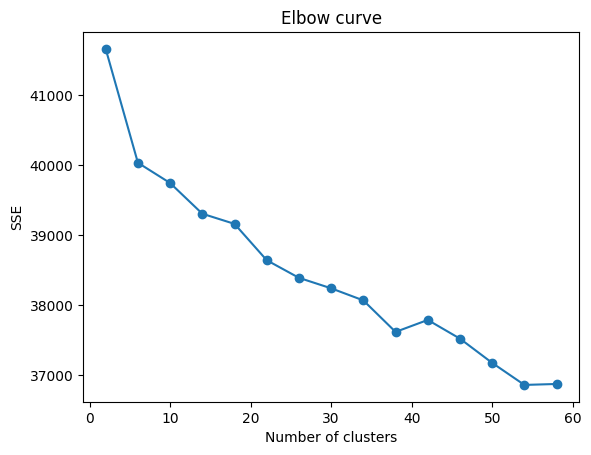

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def optimal_cluster(df, start, end, step):
    clusters = range(start, end, step)
    SSE = []
    for k in range(start, end, step):
        k_means = KMeans(n_clusters=k, random_state=32).fit(df)
        SSE.append(k_means.inertia_)
        
    plt.figure()
    plt.title("Elbow curve")
    plt.plot(clusters, SSE, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()

# Call the function
optimal_cluster(X, 2, 60, 4)


In [14]:
#Now, lets look at the top terms in each of these clusters
k_means = KMeans(n_clusters = 25, random_state = 32).fit(X)

ordered_centers = k_means.cluster_centers_.argsort()[:,::-1]
terms = vec.get_feature_names_out()
print("--Top 10 terms per cluster--")
print("")
for i in range(25):
    top_words = []
    print("Cluster",i,":")
    for j in ordered_centers[i,:30]:
        top_words.append(terms[j])
    print(top_words)
    print("")

--Top 10 terms per cluster--

Cluster 0 :
['large hadron', 'large hadron collider', 'hadron collider', 'hadron', 'collider', 'large', 'small', 'particle', 'time', 'year', 'wake', 'particle accelerator', 'start', 'weekend', 'physics', 'dawn', 'detect', 'inside', 'universe', 'ready', 'explore', 'explain', 'exist', 'help', 'shutdown', 'edge', 'cut', 'fine', 'explorer', 'export artificial']

Cluster 1 :
['cancer', 'trial', 'vaccine', 'clinical', 'clinical trial', 'cancer vaccine', 'cell', 'mrna', 'treatment', 'patient', 'test', 'scientist', 'human', 'cancer cell', 'human trial', 'feature', 'deliver', 'brain cancer', 'brain', 'therapy', 'year', 'blood', 'biontech', 'tumor', 'promise', 'mouse', 'base', 'covid19', 'tooth regrowth medicine', 'tooth regrowth']

Cluster 2 :
['bill', 'net neutrality', 'net', 'neutrality', 'net neutrality bill', 'neutrality bill', 'california', 'california net', 'california net neutrality', 'support', 'internet', 'gov', 'democrats', 'pass', 'sign', 'colorado', 'bl

In [56]:
from collections import Counter

IndexError: list index out of range

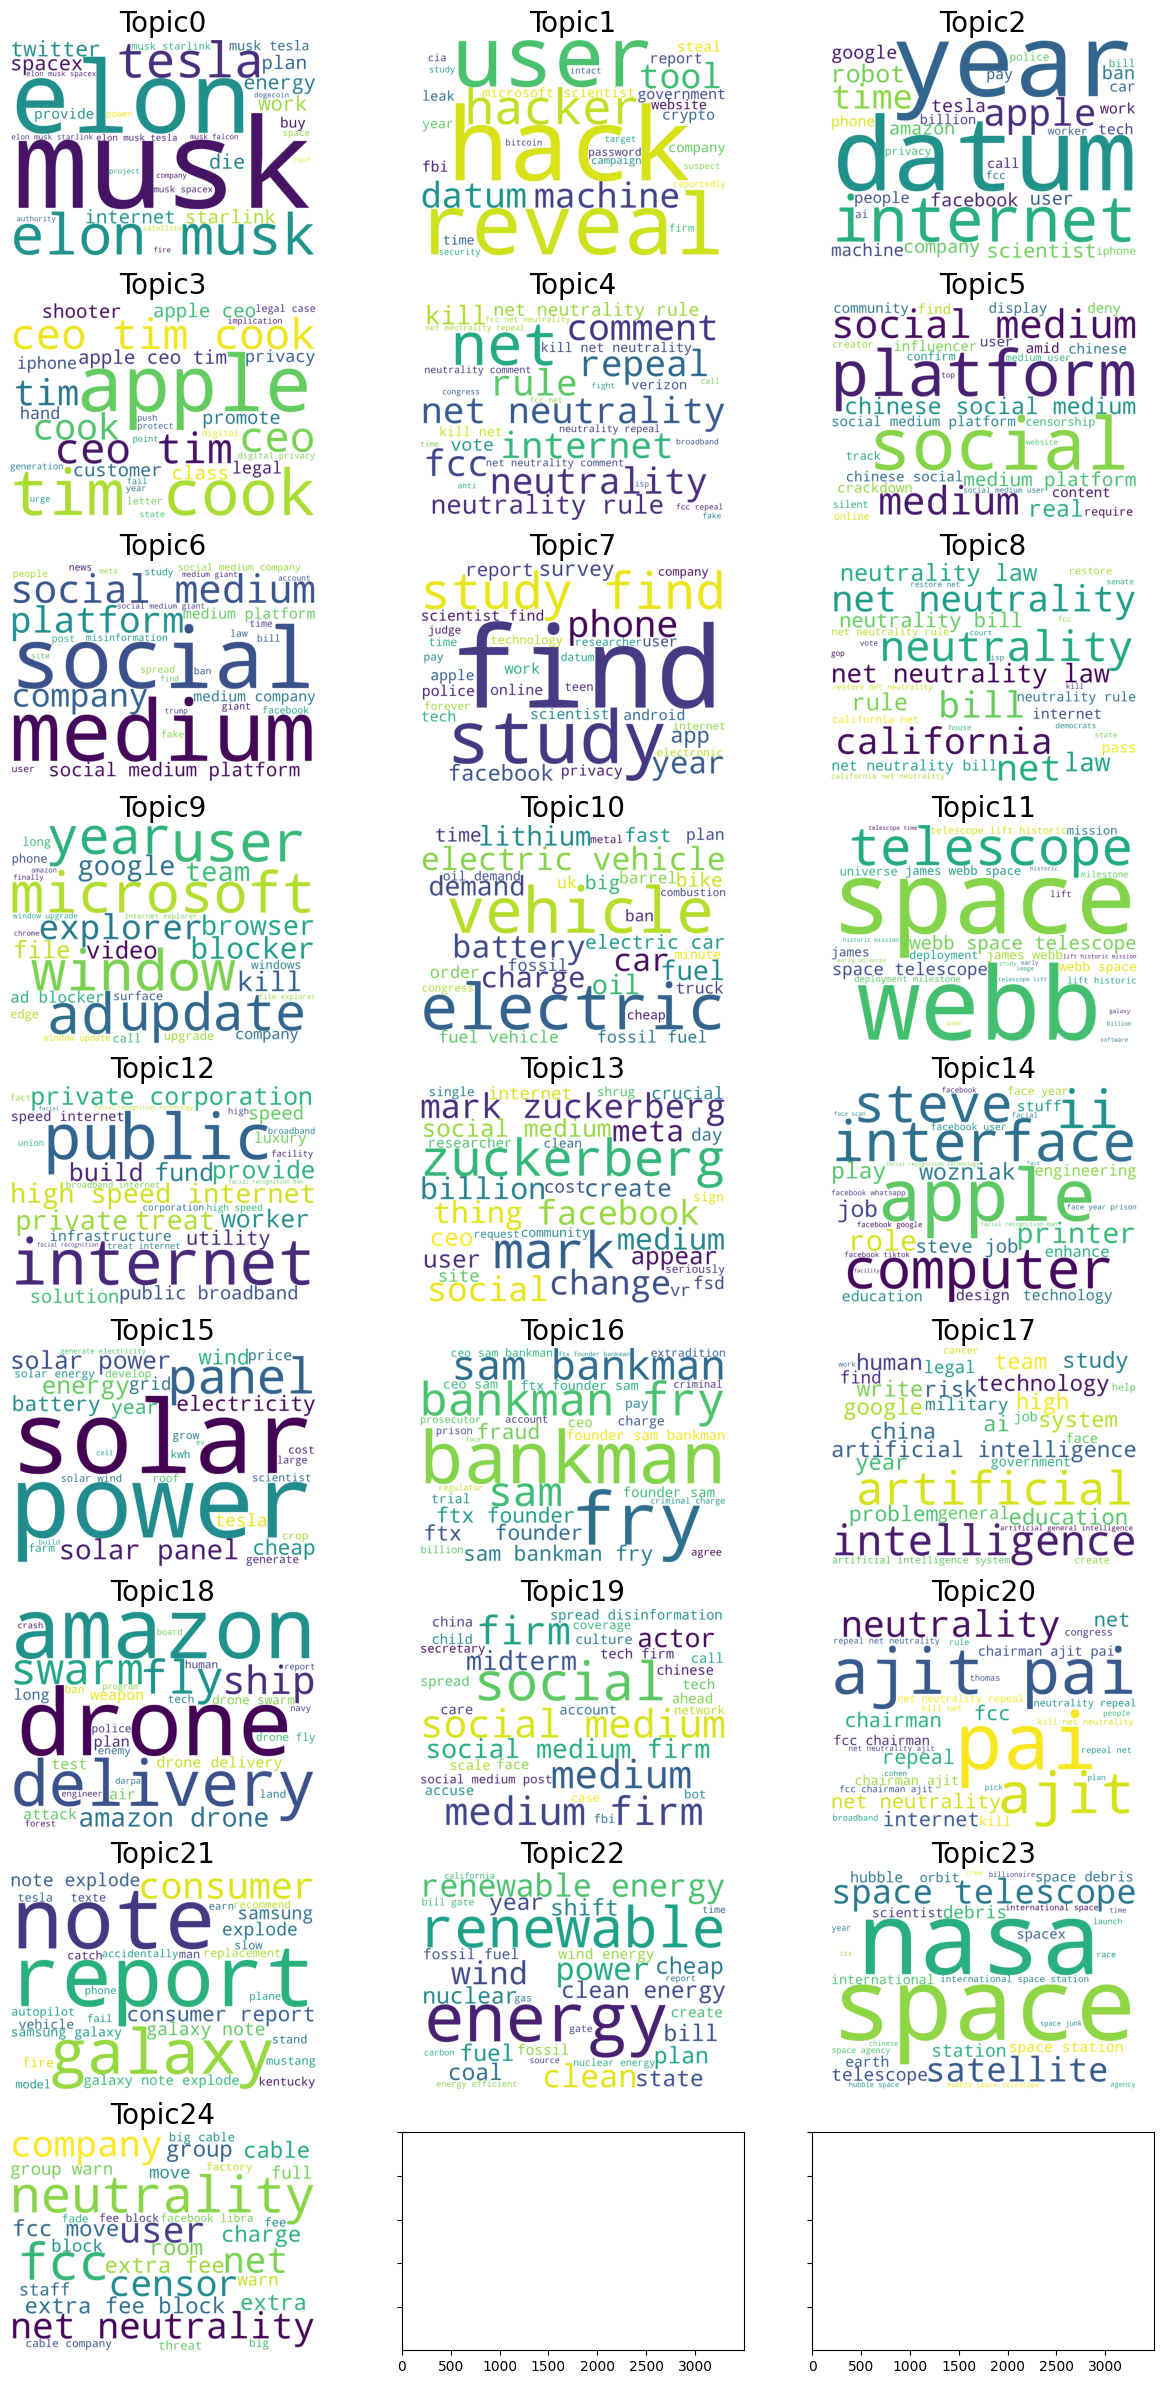

In [57]:
#getting color codes and establishing the word-cloud
#col_codes = list(mcolors.TABLEAU_COLORS.values())
cloud = WordCloud(background_color = "white",
                  prefer_horizontal = 1.0,width =3500,height = 2500)
#getting the top 50 words for each cluster based on k-means weightage
top_words = []
for clusters in range(25):
    cluster_words = []
    for words in ordered_centers[clusters,:30]:
        cluster_words.append(terms[words])
    top_words.append(cluster_words)
#making the word-cloud
fig, axes = plt.subplots(9, 3, figsize=(15, 30), sharex=True, sharey=True)

# Loop through each subplot
for ax in range(len(axes.flatten())):
    fig.add_subplot(axes.flatten()[ax])
    topic = Counter(top_words[ax])
    cloud.fit_words(topic)
    plt.imshow(cloud)
    plt.title("Topic" + str(ax), fontdict=dict(size=20))
    plt.axis("off")

# Turn off the axis for the entire plot
plt.axis("off")

# Show the plot
plt.show()

In [58]:
temp = pd.DataFrame(columns = ["topic_no","top_keywords","number_of_documents","perc_docs"])
temp.topic_no = range(25)
for i in temp.topic_no:
    temp.number_of_documents[i] = Counter(k_means.labels_)[i]
    temp.top_keywords[i] = ','.join(top_words[i][:5])
for i in temp.topic_no:
    temp.perc_docs[i] = round(temp.number_of_documents[i]/temp.number_of_documents.sum(),4)
temp

topic_no                                       top_keywords  \
0          0                  musk,elon,elon musk,tesla,twitter   
1          1                      hack,reveal,user,hacker,datum   
2          2                     datum,year,internet,apple,time   
3          3            apple,tim cook,ceo tim cook,ceo tim,ceo   
4          4           net,net neutrality,neutrality,fcc,repeal   
5          5  social,platform,social medium,medium,chinese s...   
6          6       medium,social,social medium,platform,company   
7          7                   find,study,study find,phone,year   
8          8      neutrality,net neutrality,net,bill,california   
9          9                    microsoft,window,ad,user,update   
10        10      electric,vehicle,electric vehicle,car,battery   
11        11  space,webb,telescope,webb space telescope,spac...   
12        12  internet,public,high speed internet,treat,private   
13        13    zuckerberg,mark,mark zuckerberg,facebook,change   
14        14                  apple,interface,computer,steve,ii   
15        15          solar,power,panel,solar panel,solar power   
16        16            bankman,fry,bankman fry,sam bankman,sam   
17        17  artificial,intelligence,artificial intelligenc...   
18        18                    drone,amazon,delivery,fly,swarm   
19        19       social,social medium,medium,firm,medium firm   
20        20        pai,ajit pai,ajit,neutrality,net neutrality   
21        21        report,note,galaxy,consumer,consumer report   
22        22      energy,renewable,renewable energy,power,clean   
23        23     space,nasa,space telescope,satellite,telescope   
24        24          neutrality,fcc,net neutrality,net,company   

   number_of_documents perc_docs  
0                   49    0.0113  
1                   83    0.0191  
2                 2967    0.6816  
3                    4    0.0009  
4                  193    0.0443  
5                    3    0.0007  
6                  232    0.0533  
7                  111    0.0255  
8                   43    0.0099  
9                   72    0.0165  
10                  26     0.006  
11                  13     0.003  
12                   1    0.0002  
13                  21    0.0048  
14                   1    0.0002  
15                  83    0.0191  
16                  34    0.0078  
17                 171    0.0393  
18                  64    0.0147  
19                   8    0.0018  
20                  26     0.006  
21                  10    0.0023  
22                  75    0.0172  
23                  62    0.0142  
24                   1    0.0002

In [ ]:
#few overlapping clusters 
#we will do it using LDA(Latent Dirichlet Allocation)

In [ ]:
#Using LDA(Latent Dirichlet Allocation)

In [4]:
all_posts_df = pd.read_csv('cleaned_posts.csv')
all_comments_df = pd.read_csv('cleaned_comments.csv')

In [15]:
training,testing = np.split(all_posts_df,[int(.7*len(all_posts_df))])
testing.reset_index(drop=True,inplace = True)

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
len(training)

3047

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils,models
from nltk import word_tokenize
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore")

In [20]:
stop_words = ["a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent","arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","different","do","does","doing","done","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","have","having","he","hed","hence","her","here","hereafter","hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","it","itd","its","itself","j","just","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most","mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","she","shed","shes","should","show","showed","shown","showns","shows","significant","significantly",
               "similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","t","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","thats","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","thereof","therere","theres","thereto","thereupon","these","they","theyd","theyre","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til","tip","to","together","too","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","very","via","viz","vol","vols","vs","w","want","wants","was","wasnt","way","we","wed","welcome","went","were","werent","we've","what","whatever","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would","wouldnt","www","x","y","yes","yet","you","youd","your","youre","yours","yourself","yourselves","z","zero","¿½ï","ý","½ï","½","½dinger"]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create a list of cleaned post titles
cleaned_titles = list(all_posts_df['cleaned_title'])

# Initialize CountVectorizer
vec = CountVectorizer(lowercase=True, stop_words = stop_words, ngram_range=(1, 3), max_features=5000)

# Fit and transform the cleaned post titles
X = vec.fit_transform(cleaned_titles)

# Get the feature names
feature_names = vec.get_feature_names_out()

# Create a DataFrame from the document-term matrix
dtm_posts = pd.DataFrame(X.toarray(), columns=feature_names)

# Display the first few rows of the document-term matrix
print(dtm_posts.head())

   1000  10000  100000  100mbps  10mbps  10mbps upload  10x  12  15  1500  \
0     0      0       0        0       0              0    0   0   0     0   
1     0      0       0        0       0              0    0   0   0     0   
2     0      0       0        0       0              0    0   0   0     0   
3     0      0       0        0       0              0    0   0   0     0   
4     0      0       0        0       0              0    0   0   0     0   

   ...  york city  york lawmaker  york times  young  young people  youtube  \
0  ...          0              0           0      0             0        0   
1  ...          0              0           0      0             0        0   
2  ...          0              0           0      0             0        0   
3  ...          0              0           0      0             0        0   
4  ...          0              0           0      0             0        0   

   zone  zoom  zte  zuckerberg  
0     0     0    0           0  
1 

In [22]:
#we can directly convert our scipy_sparse_matrix 'X' into genism corpus using matutils
corpus = matutils.Sparse2Corpus(X.T)

In [23]:
#id2word is a dictionary containing all terms(mapped to a code) and their locations(indexes) in term-document matrix
id2word = dict(enumerate(vec.get_feature_names_out()))

In [24]:
#building multiple models to short list number of topics based on coherence scores - we observed previously a range of 10-25 
#topics with k-means, therefore, lets look at the range more closely

#lets understand the optimal number of topics using coherence metrics. We'll use "umass" since it takes less time to compute.
# Initialize a list to store coherence scores
c_score = []

topic_range = range(15, 30, 1)

for topic in topic_range:
    lda = models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = topic,eval_every = None,passes=3)
    umass_metric = CoherenceModel(model = lda, corpus = corpus, coherence = "u_mass")
    c_score.append(umass_metric.get_coherence())


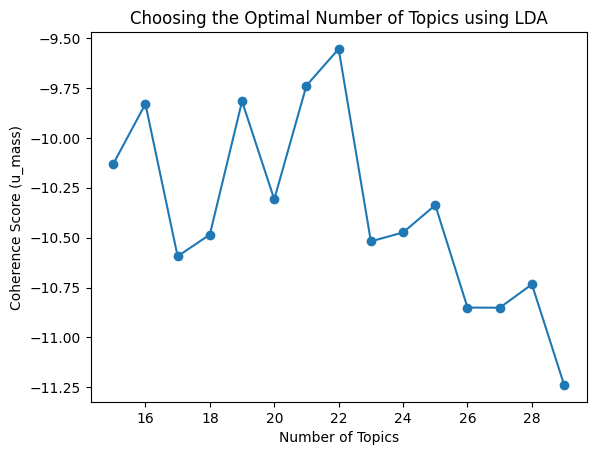

In [14]:
# Plot the coherence scores 
#umass-graph
plt.figure()
plt.plot(topic_range, c_score, marker="o")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (u_mass)")
plt.title("Choosing the Optimal Number of Topics using LDA")
plt.show()

In [49]:
#The curve initially increases sharply as the number of topics increases. 
#This indicates that adding more topics initially helps to identify more specific and coherent themes within the data.

#However, after a certain point, the curve starts to flatten out or even decrease slightly. 
#This suggests that adding more topics beyond this point is not improving the coherence of the topics and might be leading to overfitting or irrelevant topics

In [25]:
from gensim.models import LdaMulticore

lda25 = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=25, passes=2, eval_every=None)
lda25.print_topics()

[(23,
  '0.010*"find" + 0.008*"facebook" + 0.005*"nuclear" + 0.005*"billion" + 0.005*"internet" + 0.004*"artificial" + 0.004*"datum" + 0.004*"intelligence" + 0.004*"fund" + 0.004*"google"'),
 (4,
  '0.009*"bitcoin" + 0.007*"state" + 0.006*"company" + 0.006*"police" + 0.006*"human" + 0.005*"user" + 0.005*"hack" + 0.005*"machine" + 0.005*"big" + 0.005*"time"'),
 (19,
  '0.010*"year" + 0.006*"bill" + 0.005*"facebook" + 0.005*"tech" + 0.005*"energy" + 0.005*"google" + 0.005*"big" + 0.005*"cost" + 0.005*"phone" + 0.004*"trump"'),
 (17,
  '0.008*"net neutrality" + 0.008*"neutrality" + 0.008*"net" + 0.006*"bill" + 0.006*"medium" + 0.006*"time" + 0.005*"help" + 0.005*"social medium" + 0.005*"facebook" + 0.005*"year"'),
 (14,
  '0.011*"medium" + 0.010*"social" + 0.010*"social medium" + 0.008*"time" + 0.007*"ban" + 0.007*"learning" + 0.006*"anti" + 0.005*"datum" + 0.005*"bill" + 0.004*"iphone"'),
 (12,
  '0.011*"machine" + 0.010*"datum" + 0.009*"user" + 0.007*"ad" + 0.007*"ban" + 0.006*"power" +

In [27]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda25, corpus, dictionary=dct, sort_topics=False, mds='mmds')
vis.num_terms = 10
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.050124  0.143007       1        1  4.443719
1      0.200421  0.000627       2        1  4.012292
2     -0.191839  0.009135       3        1  3.955380
3      0.256806  0.071602       4        1  4.001016
4     -0.024325 -0.062900       5        1  4.258428
5     -0.218910 -0.091207       6        1  3.424577
6      0.091804 -0.118161       7        1  4.250206
7     -0.232119  0.073958       8        1  3.823445
8      0.113195 -0.003875       9        1  4.153631
9      0.186900 -0.081761      10        1  3.848495
10     0.176780  0.169625      11        1  4.503876
11     0.120527  0.115870      12        1  3.920527
12     0.096118 -0.219524      13        1  4.030189
13    -0.173222 -0.171715      14        1  3.169732
14    -0.109967 -0.212494      15        1  3.257505
15    -0.118316  0.100190      16        1  6.938771
16    -0.196556  0.168354      17        1  4.954795
17    -0.012401  0.054776      18        1  4.067471
18    -0.021520 -0.167224      19        1  3.155317
19     0.063917  0.216565      20        1  3.969000
20    -0.028313  0.238641      21        1  3.796582
21    -0.093132  0.200013      22        1  3.872550
22    -0.132064 -0.021542      23        1  3.261147
23     0.000288 -0.243724      24        1  3.383682
24     0.195803 -0.168237      25        1  3.547668, topic_info=                Term        Freq       Total Category  logprob  loglift
4092   social medium  234.000000  234.000000  Default  30.0000  30.0000
2716          medium  262.000000  262.000000  Default  29.0000  29.0000
4087          social  249.000000  249.000000  Default  28.0000  28.0000
2932  net neutrality  248.000000  248.000000  Default  27.0000  27.0000
2968      neutrality  248.000000  248.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
4981            year    5.877252  164.352413  Topic25  -5.5066   0.0080
1958           giant    4.370193   37.025227  Topic25  -5.8029   1.2021
4684            turn    4.426258   45.228631  Topic25  -5.7902   1.0147
4795           video    4.449989   50.322810  Topic25  -5.7848   0.9133
1473        electric    4.417326   65.565053  Topic25  -5.7922   0.6414

[1767 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4         6  0.286457      10mbps
4        24  0.286457      10mbps
14       13  0.282192        2000
14       18  0.564385        2000
18       19  0.280036          2d
...     ...       ...         ...
4999     19  0.039348  zuckerberg
4999     20  0.039348  zuckerberg
4999     21  0.039348  zuckerberg
4999     23  0.039348  zuckerberg
4999     24  0.039348  zuckerberg

[7276 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [28]:
lda20 = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=20, passes=2, eval_every=None)
lda20.print_topics()

[(0,
  '0.014*"medium" + 0.013*"social" + 0.013*"social medium" + 0.008*"fcc" + 0.007*"neutrality" + 0.007*"net" + 0.007*"net neutrality" + 0.006*"company" + 0.006*"twitter" + 0.006*"ai"'),
 (1,
  '0.011*"people" + 0.011*"space" + 0.008*"social" + 0.008*"medium" + 0.008*"social medium" + 0.006*"time" + 0.006*"google" + 0.005*"musk" + 0.005*"space telescope" + 0.004*"telescope"'),
 (2,
  '0.011*"electric" + 0.007*"sue" + 0.006*"car" + 0.006*"datum" + 0.006*"energy" + 0.006*"tesla" + 0.005*"electric car" + 0.005*"iphone" + 0.005*"year" + 0.004*"tech"'),
 (3,
  '0.011*"user" + 0.006*"ad" + 0.005*"rule" + 0.005*"medium" + 0.005*"find" + 0.005*"apple" + 0.005*"google" + 0.005*"ban" + 0.005*"social" + 0.004*"facebook"'),
 (4,
  '0.012*"intelligence" + 0.012*"artificial" + 0.011*"artificial intelligence" + 0.009*"internet" + 0.006*"bankman" + 0.006*"speed" + 0.006*"bankman fry" + 0.006*"fry" + 0.006*"company" + 0.006*"sam bankman"'),
 (5,
  '0.012*"net neutrality" + 0.012*"neutrality" + 0.012

In [29]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda20, corpus, dictionary=dct, sort_topics=False, mds='mmds')
vis.num_terms = 10
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.134224 -0.059558       1        1  4.480325
1      0.215215  0.049965       2        1  4.718279
2     -0.098299  0.006040       3        1  5.101730
3     -0.175019 -0.093438       4        1  5.913428
4      0.064824 -0.234651       5        1  5.308976
5     -0.022540 -0.133225       6        1  4.287170
6     -0.137957 -0.159371       7        1  4.656971
7      0.016786  0.011002       8        1  4.914550
8      0.032992  0.113634       9        1  5.204782
9      0.090623 -0.146241      10        1  6.533077
10     0.199721 -0.124925      11        1  4.529902
11    -0.023398  0.233877      12        1  6.032846
12     0.163814  0.146920      13        1  4.635625
13    -0.162642  0.162409      14        1  4.474161
14     0.098161  0.214073      15        1  4.522484
15    -0.085318  0.144054      16        1  4.193144
16    -0.207861 -0.018791      17        1  4.016057
17    -0.197699  0.064275      18        1  5.724975
18     0.148119  0.017144      19        1  5.543907
19    -0.053747 -0.193192      20        1  5.207610, topic_info=                Term        Freq       Total Category  logprob  loglift
2968      neutrality  251.000000  251.000000  Default  30.0000  30.0000
2932  net neutrality  251.000000  251.000000  Default  29.0000  29.0000
2930             net  260.000000  260.000000  Default  28.0000  28.0000
2716          medium  249.000000  249.000000  Default  27.0000  27.0000
4092   social medium  221.000000  221.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
2339    intelligence    7.986072  161.003555  Topic20  -5.5839  -0.0487
1110          create    6.379134   60.858875  Topic20  -5.8085   0.6995
480          billion    6.568408   85.610093  Topic20  -5.7793   0.3875
4981            year    6.738580  166.100188  Topic20  -5.7537  -0.2497
3670          report    6.396228   81.123802  Topic20  -5.8059   0.4148

[1463 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
20        1  0.046550          3d
20        3  0.046550          3d
20        5  0.279301          3d
20        7  0.093100          3d
20        8  0.093100          3d
...     ...       ...         ...
4999     13  0.077472  zuckerberg
4999     14  0.038736  zuckerberg
4999     17  0.038736  zuckerberg
4999     18  0.077472  zuckerberg
4999     20  0.116208  zuckerberg

[5749 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [72]:
lda15 = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=15, passes=2, eval_every=None)
lda15.print_topics()

[(0,
  '0.016*"social" + 0.015*"medium" + 0.014*"social medium" + 0.012*"facebook" + 0.008*"apple" + 0.007*"datum" + 0.006*"account" + 0.006*"billion" + 0.004*"ban" + 0.004*"police"'),
 (1,
  '0.006*"scientist" + 0.005*"microsoft" + 0.004*"social" + 0.004*"datum" + 0.004*"company" + 0.004*"musk" + 0.004*"drone" + 0.004*"privacy" + 0.004*"billion" + 0.004*"medium"'),
 (2,
  '0.007*"electric" + 0.006*"net" + 0.006*"neutrality" + 0.006*"net neutrality" + 0.006*"energy" + 0.005*"power" + 0.005*"artificial" + 0.005*"nuclear" + 0.005*"intelligence" + 0.005*"artificial intelligence"'),
 (3,
  '0.027*"net neutrality" + 0.026*"net" + 0.026*"neutrality" + 0.020*"fcc" + 0.010*"internet" + 0.007*"company" + 0.006*"datum" + 0.006*"kill" + 0.005*"employee" + 0.005*"congress"'),
 (4,
  '0.011*"company" + 0.010*"medium" + 0.010*"social medium" + 0.010*"social" + 0.008*"datum" + 0.007*"pay" + 0.007*"billion" + 0.006*"amazon" + 0.006*"internet" + 0.005*"plan"'),
 (5,
  '0.011*"medium" + 0.010*"social" +

In [73]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda15, corpus, dictionary=dct, sort_topics=False, mds='mmds')
vis.num_terms = 10
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.104501  0.178032       1        1   7.140075
1     -0.039274  0.135945       2        1   5.963452
2     -0.186586  0.073168       3        1   5.729258
3      0.054296  0.205609       4        1  10.021398
4      0.188628  0.053321       5        1   6.994218
5     -0.051474  0.018912       6        1   6.114507
6      0.066919 -0.185191       7        1   7.354163
7      0.130920  0.123350       8        1   5.566424
8     -0.074666 -0.164788       9        1   6.638240
9     -0.179434 -0.023921      10        1   6.919626
10     0.063026  0.006372      11        1   7.782616
11     0.191769 -0.061273      12        1   5.984102
12    -0.165232 -0.120103      13        1   4.731633
13     0.114476 -0.103451      14        1   6.626519
14    -0.008868 -0.135983      15        1   6.433768, topic_info=                         Term        Freq       Total Category  logprob  \
2982           net neutrality  250.000000  250.000000  Default  30.0000   
3014               neutrality  249.000000  249.000000  Default  29.0000   
2981                      net  257.000000  257.000000  Default  28.0000   
306   artificial intelligence  148.000000  148.000000  Default  27.0000   
2363             intelligence  162.000000  162.000000  Default  26.0000   
...                       ...         ...         ...      ...      ...   
498                   billion    7.976343   88.767755  Topic15  -5.7689   
3912                scientist    8.094565  123.014103  Topic15  -5.7542   
528                   bitcoin    7.337175   61.226690  Topic15  -5.8524   
2382                 internet    7.813774  170.714930  Topic15  -5.7895   
3722                   report    7.232866   82.612232  Topic15  -5.8668   

      loglift  
2982  30.0000  
3014  29.0000  
2981  28.0000  
306   27.0000  
2363  26.0000  
...       ...  
498    0.3341  
3912   0.0225  
528    0.6220  
2382  -0.3405  
3722   0.3081  

[1165 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
12        4  0.104776         1st
12        5  0.209552         1st
12        6  0.104776         1st
12        8  0.419105         1st
12       10  0.104776         1st
...     ...       ...         ...
4999      9  0.118076  zuckerberg
4999     11  0.314869  zuckerberg
4999     12  0.039359  zuckerberg
4999     13  0.196793  zuckerberg
4999     14  0.118076  zuckerberg

[4268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [74]:
lda10 = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10, passes=2, eval_every=None)
lda10.print_topics()

[(0,
  '0.024*"medium" + 0.022*"social" + 0.022*"social medium" + 0.006*"datum" + 0.006*"ban" + 0.006*"car" + 0.005*"crypto" + 0.005*"solar" + 0.005*"china" + 0.004*"facebook"'),
 (1,
  '0.009*"ai" + 0.006*"tech" + 0.006*"artificial" + 0.006*"machine" + 0.006*"internet" + 0.006*"intelligence" + 0.006*"artificial intelligence" + 0.005*"rule" + 0.005*"datum" + 0.005*"repair"'),
 (2,
  '0.009*"amazon" + 0.008*"net neutrality" + 0.008*"neutrality" + 0.008*"net" + 0.006*"scientist" + 0.006*"report" + 0.005*"cancer" + 0.005*"ai" + 0.004*"facebook" + 0.004*"company"'),
 (3,
  '0.006*"scientist" + 0.006*"launch" + 0.006*"robot" + 0.005*"electric" + 0.005*"energy" + 0.005*"machine" + 0.004*"study" + 0.004*"datum" + 0.004*"vehicle" + 0.004*"musk"'),
 (4,
  '0.012*"medium" + 0.012*"social medium" + 0.012*"social" + 0.010*"tesla" + 0.007*"net" + 0.006*"neutrality" + 0.006*"net neutrality" + 0.006*"company" + 0.005*"tech" + 0.005*"facebook"'),
 (5,
  '0.007*"machine" + 0.007*"billion" + 0.006*"datu

In [75]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda10, corpus, dictionary=dct, sort_topics=False, mds='mmds')
vis.num_terms = 10
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.091839  0.155016       1        1  10.406027
1      0.055264 -0.138562       2        1  10.312711
2      0.088166  0.161427       3        1   9.138191
3     -0.074120 -0.160774       4        1  10.033531
4     -0.115270  0.059331       5        1   9.439280
5      0.041807  0.077375       6        1   7.136590
6      0.154135 -0.082638       7        1   9.262434
7     -0.167115 -0.045999       8        1   9.913865
8      0.143651  0.021573       9        1  14.072234
9     -0.034679 -0.046747      10        1  10.285135, topic_info=               Term        Freq       Total Category  logprob  loglift
4154  social medium  226.000000  226.000000  Default  30.0000  30.0000
2788         medium  253.000000  253.000000  Default  29.0000  29.0000
4150         social  239.000000  239.000000  Default  28.0000  28.0000
2981            net  252.000000  252.000000  Default  27.0000  27.0000
3014     neutrality  244.000000  244.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
3317           plan   13.028851   90.047172  Topic10  -5.7474   0.3413
1672       facebook   14.007968  121.178708  Topic10  -5.6749   0.1168
1888          force   11.019467   54.310356  Topic10  -5.9149   0.6794
2015         google   13.397717  118.631514  Topic10  -5.7195   0.0935
3912      scientist   10.482499  124.088716  Topic10  -5.9648  -0.1968

[845 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
17        1  0.156845       25000
17        4  0.627378       25000
17        6  0.156845       25000
22        1  0.724574        30th
26        3  0.142333          3d
...     ...       ...         ...
4999      5  0.077365  zuckerberg
4999      6  0.116047  zuckerberg
4999      8  0.193412  zuckerberg
4999      9  0.038682  zuckerberg
4999     10  0.038682  zuckerberg

[2658 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [76]:
#LdA with 14 topics
lda14 = models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = 14, passes=3, eval_every = None)
lda14.print_topics()

[(0,
  '0.022*"social" + 0.022*"medium" + 0.022*"social medium" + 0.008*"fcc" + 0.006*"report" + 0.006*"facebook" + 0.005*"china" + 0.005*"ban" + 0.005*"net" + 0.004*"neutrality"'),
 (1,
  '0.014*"apple" + 0.010*"amazon" + 0.009*"google" + 0.007*"tesla" + 0.006*"iphone" + 0.005*"system" + 0.005*"ai" + 0.005*"track" + 0.005*"company" + 0.004*"sell"'),
 (2,
  '0.026*"net" + 0.025*"neutrality" + 0.025*"net neutrality" + 0.019*"artificial" + 0.018*"intelligence" + 0.018*"artificial intelligence" + 0.012*"bill" + 0.011*"fcc" + 0.010*"medium" + 0.010*"internet"'),
 (3,
  '0.016*"net" + 0.016*"neutrality" + 0.016*"net neutrality" + 0.009*"fcc" + 0.009*"energy" + 0.007*"plan" + 0.006*"internet" + 0.005*"consumer" + 0.005*"elon" + 0.005*"musk"'),
 (4,
  '0.009*"scientist" + 0.007*"spacex" + 0.006*"launch" + 0.005*"renewable" + 0.005*"good" + 0.005*"bitcoin" + 0.004*"broadband" + 0.004*"help" + 0.004*"tesla" + 0.004*"fcc"'),
 (5,
  '0.007*"internet" + 0.007*"bankman" + 0.007*"net" + 0.007*"sam" 

In [77]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda14, corpus, dictionary=dct, sort_topics=False, mds='mmds')
vis.num_terms = 10
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.088871  0.058213       1        1   7.688984
1     -0.078906  0.031900       2        1   7.705470
2     -0.213116 -0.078772       3        1  11.332559
3      0.015845 -0.079333       4        1   7.553062
4     -0.188693  0.081920       5        1   7.008394
5      0.152456 -0.126187       6        1   5.532302
6      0.200195 -0.034639       7        1   5.418256
7      0.201955  0.109477       8        1   6.382545
8      0.073020  0.191270       9        1   6.945130
9      0.065453 -0.195010      10        1   7.310689
10    -0.125833 -0.083809      11        1   7.313761
11    -0.067576 -0.202566      12        1   5.990504
12    -0.012774  0.126792      13        1   6.485710
13    -0.110895  0.200744      14        1   7.332635, topic_info=                Term        Freq       Total Category  logprob  loglift
2981             net  255.000000  255.000000  Default  30.0000  30.0000
3014      neutrality  247.000000  247.000000  Default  29.0000  29.0000
2982  net neutrality  247.000000  247.000000  Default  28.0000  28.0000
4154   social medium  224.000000  224.000000  Default  27.0000  27.0000
4150          social  238.000000  238.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1902         founder    7.610488   30.471040  Topic14  -5.9466   1.2256
3480         privacy    8.874401   70.359244  Topic14  -5.7930   0.5424
3722          report    8.959560   82.598227  Topic14  -5.7834   0.3916
3289           phone    8.899535   84.802931  Topic14  -5.7902   0.3585
528          bitcoin    8.149010   62.174964  Topic14  -5.8783   0.5808

[1076 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
21       13  0.784779      30b
42        7  0.693457    50000
42       10  0.231152    50000
48        8  0.740766     6000
59       10  0.833328      999
...     ...       ...      ...
4995      7  0.044266  youtube
4995     10  0.044266  youtube
4995     11  0.044266  youtube
4995     12  0.044266  youtube
4995     13  0.044266  youtube

[3518 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [78]:
lda12= LdaMulticore(corpus=corpus, id2word=id2word, num_topics=12, passes=2, eval_every=None)
lda12.print_topics()

[(0,
  '0.010*"electric" + 0.008*"vehicle" + 0.006*"internet" + 0.006*"fcc" + 0.005*"electric vehicle" + 0.005*"tesla" + 0.005*"battery" + 0.005*"space" + 0.005*"human" + 0.005*"car"'),
 (1,
  '0.022*"net" + 0.022*"net neutrality" + 0.022*"neutrality" + 0.014*"fcc" + 0.006*"ban" + 0.006*"tech" + 0.005*"repeal" + 0.005*"machine" + 0.004*"pay" + 0.004*"datum"'),
 (2,
  '0.014*"medium" + 0.014*"social" + 0.013*"social medium" + 0.007*"google" + 0.007*"scientist" + 0.006*"facebook" + 0.005*"anti" + 0.005*"robot" + 0.004*"bad" + 0.004*"platform"'),
 (3,
  '0.006*"machine" + 0.005*"google" + 0.005*"company" + 0.005*"block" + 0.005*"launch" + 0.005*"plan" + 0.005*"internet" + 0.005*"bankman" + 0.005*"court" + 0.004*"learning"'),
 (4,
  '0.010*"datum" + 0.006*"app" + 0.005*"state" + 0.005*"net" + 0.005*"power" + 0.005*"net neutrality" + 0.005*"neutrality" + 0.005*"speed" + 0.005*"location" + 0.005*"apple"'),
 (5,
  '0.016*"social" + 0.015*"medium" + 0.015*"social medium" + 0.007*"facebook" + 0

In [79]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda12,corpus,dictionary = dct,sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.058669  0.059007       1        1   6.916389
1     -0.117518 -0.046801       2        1  10.353650
2      0.046807 -0.076824       3        1   9.151383
3      0.058280  0.068249       4        1   6.992784
4     -0.031076  0.020442       5        1   7.530762
5      0.073844 -0.042804       6        1   8.680324
6      0.045973 -0.065295       7        1   8.157171
7      0.060218 -0.055923       8        1   8.263471
8      0.033257  0.111231       9        1   9.148976
9      0.050098  0.048667      10        1   8.618827
10    -0.080688 -0.013902      11        1   7.921009
11    -0.080525 -0.006046      12        1   8.265255, topic_info=                Term        Freq       Total Category  logprob  loglift
2981             net  253.000000  253.000000  Default  30.0000  30.0000
3014      neutrality  245.000000  245.000000  Default  29.0000  29.0000
2982  net neutrality  245.000000  245.000000  Default  28.0000  28.0000
2363    intelligence  164.000000  164.000000  Default  27.0000  27.0000
303       artificial  167.000000  167.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
4184           solar   10.248785   88.193342  Topic12  -5.7687   0.3407
2174            help    9.219920   65.159169  Topic12  -5.8745   0.5376
1244           datum   10.628793  151.901546  Topic12  -5.7323  -0.1666
2788          medium    9.854854  251.494850  Topic12  -5.8079  -0.7463
728       california    8.125043   53.725147  Topic12  -6.0009   0.6042

[966 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
8         3  0.286997          15
8         6  0.573994          15
37        2  0.726351          45
56        3  0.752686          85
80        1  0.062627      access
...     ...       ...         ...
4999      7  0.039254  zuckerberg
4999      8  0.078509  zuckerberg
4999     10  0.471053  zuckerberg
4999     11  0.039254  zuckerberg
4999     12  0.039254  zuckerberg

[3256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [80]:
lda18= LdaMulticore(corpus=corpus, id2word=id2word, num_topics=18, passes=3, eval_every=None)
lda18.print_topics()

[(0,
  '0.011*"robot" + 0.008*"amazon" + 0.008*"machine" + 0.007*"help" + 0.006*"worker" + 0.005*"broadband" + 0.005*"machine learning" + 0.005*"pai" + 0.005*"ajit" + 0.005*"warehouse"'),
 (1,
  '0.034*"artificial" + 0.034*"intelligence" + 0.032*"artificial intelligence" + 0.008*"ai" + 0.008*"google" + 0.006*"tech" + 0.005*"machine" + 0.005*"big" + 0.005*"researcher" + 0.005*"fcc"'),
 (2,
  '0.007*"billion" + 0.007*"pay" + 0.006*"rocket" + 0.006*"kill" + 0.005*"facebook" + 0.005*"ftx" + 0.005*"system" + 0.005*"spacex" + 0.004*"falcon" + 0.004*"software"'),
 (3,
  '0.007*"tesla" + 0.007*"state" + 0.007*"bankman" + 0.006*"sam bankman" + 0.006*"sam" + 0.006*"bill" + 0.005*"report" + 0.005*"company" + 0.005*"employee" + 0.005*"datum"'),
 (4,
  '0.012*"energy" + 0.010*"company" + 0.010*"musk" + 0.010*"elon musk" + 0.010*"elon" + 0.009*"neutrality" + 0.009*"net neutrality" + 0.009*"net" + 0.008*"renewable" + 0.007*"internet"'),
 (5,
  '0.055*"net" + 0.054*"neutrality" + 0.054*"net neutrality

In [81]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda18,corpus,dictionary = dct,sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.000228 -0.003326       1        1  4.502697
1     -0.008236  0.007048       2        1  5.890866
2     -0.018588  0.054437       3        1  4.569288
3      0.018668  0.033514       4        1  4.600643
4     -0.048382 -0.071672       5        1  4.928763
5     -0.253039 -0.029327       6        1  8.488673
6     -0.019401  0.032193       7        1  5.544007
7     -0.001584  0.015260       8        1  4.738749
8     -0.013481  0.059916       9        1  5.304834
9      0.035567  0.064900      10        1  5.413437
10     0.069267  0.055389      11        1  5.476203
11     0.029881 -0.116229      12        1  4.986534
12     0.028225  0.060113      13        1  6.580730
13     0.087964 -0.091309      14        1  5.194523
14    -0.021304 -0.000139      15        1  5.261076
15     0.013625  0.035336      16        1  5.134826
16     0.047610  0.034732      17        1  5.629418
17     0.052981 -0.140834      18        1  7.754732, topic_info=                Term        Freq       Total Category  logprob  loglift
3014      neutrality  268.000000  268.000000  Default  30.0000  30.0000
2982  net neutrality  268.000000  268.000000  Default  29.0000  29.0000
2981             net  277.000000  277.000000  Default  28.0000  28.0000
4150          social  237.000000  237.000000  Default  27.0000  27.0000
4154   social medium  224.000000  224.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
3912       scientist    9.571606  121.637612  Topic18  -5.7733   0.0146
894            claim    7.943531   47.209150  Topic18  -5.9598   0.7746
1456           drone    8.138821   61.677310  Topic18  -5.9355   0.5316
2564             law    8.170897   80.750198  Topic18  -5.9316   0.2661
1252             day    7.949464   64.765780  Topic18  -5.9590   0.4592

[1342 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6         4  0.227632      10x
6        12  0.455264      10x
7        11  0.280744       12
7        16  0.561487       12
25        3  0.576773       35
...     ...       ...      ...
4995     10  0.367344  youtube
4995     11  0.091836  youtube
4995     13  0.137754  youtube
4995     14  0.137754  youtube
4996      7  0.877836     zone

[4712 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [30]:
lda16= LdaMulticore(corpus=corpus, id2word=id2word, num_topics=16, passes=3, eval_every=None)
lda16.print_topics()

[(0,
  '0.011*"social" + 0.011*"medium" + 0.010*"year" + 0.010*"social medium" + 0.007*"people" + 0.006*"space" + 0.005*"platform" + 0.005*"scientist" + 0.005*"net neutrality" + 0.005*"net"'),
 (1,
  '0.007*"scientist" + 0.007*"facebook" + 0.006*"facial" + 0.006*"datum" + 0.006*"recognition" + 0.006*"facial recognition" + 0.005*"rocket" + 0.005*"time" + 0.005*"launch" + 0.005*"spacex"'),
 (2,
  '0.010*"find" + 0.010*"amazon" + 0.009*"social" + 0.009*"social medium" + 0.009*"medium" + 0.007*"big" + 0.006*"google" + 0.006*"apple" + 0.006*"company" + 0.006*"year"'),
 (3,
  '0.009*"internet" + 0.006*"electric" + 0.006*"space" + 0.005*"power" + 0.005*"security" + 0.005*"ftx" + 0.004*"user" + 0.004*"court" + 0.004*"google" + 0.004*"iphone"'),
 (4,
  '0.021*"artificial" + 0.021*"intelligence" + 0.020*"artificial intelligence" + 0.016*"medium" + 0.015*"social medium" + 0.015*"social" + 0.006*"company" + 0.006*"twitter" + 0.006*"internet" + 0.006*"bitcoin"'),
 (5,
  '0.008*"time" + 0.007*"datum

In [34]:
#gensim dictionary required for input
dct = Dictionary.from_corpus(corpus,id2word = id2word)
vis = pyLDAvis.gensim.prepare(lda16,corpus,dictionary = dct,sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.004488  0.033278       1        1  6.862530
1     -0.018040 -0.087514       2        1  5.844569
2      0.050265  0.018641       3        1  6.132034
3     -0.068848 -0.067393       4        1  6.990046
4      0.079757  0.108606       5        1  6.681681
5      0.025481 -0.053630       6        1  5.154700
6     -0.218666  0.107553       7        1  8.420642
7      0.062227  0.090902       8        1  6.966339
8      0.036239 -0.068228       9        1  5.691852
9     -0.014632 -0.081473      10        1  5.578989
10    -0.004817 -0.028032      11        1  5.424125
11    -0.035449 -0.001207      12        1  6.513502
12     0.073172  0.056884      13        1  5.960075
13     0.017626 -0.008051      14        1  5.150332
14    -0.016024 -0.020737      15        1  6.867623
15     0.027220  0.000400      16        1  5.760960, topic_info=                         Term        Freq       Total Category  logprob  \
2932           net neutrality  262.000000  262.000000  Default  30.0000   
2968               neutrality  262.000000  262.000000  Default  29.0000   
2930                      net  272.000000  272.000000  Default  28.0000   
2339             intelligence  163.000000  163.000000  Default  27.0000   
269   artificial intelligence  149.000000  149.000000  Default  26.0000   
...                       ...         ...         ...      ...      ...   
1983                   google    8.075376  119.040472  Topic16  -5.6737   
2523                      law    7.458598   79.930510  Topic16  -5.7532   
3094                   online    6.770216   49.012728  Topic16  -5.8500   
1796                     find    7.492780  124.023196  Topic16  -5.7486   
4767                     user    6.859363  122.920589  Topic16  -5.8369   

      loglift  
2932  30.0000  
2968  29.0000  
2930  28.0000  
2339  27.0000  
269   26.0000  
...       ...  
1983   0.1634  
2523   0.4823  
3094   0.8745  
1796   0.0475  
4767  -0.0319  

[1217 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
22       11  0.566799             3d printer
44        3  0.754106             999 amazon
45        3  0.754165       999 amazon prime
49        9  0.757297                abolish
51       15  0.762440        abortion center
...     ...       ...                    ...
4987     13  0.076700                   york
4987     15  0.076700                   york
4987     16  0.038350                   york
4988      1  0.699710          york attorney
4989      1  0.699722  york attorney general

[4083 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])